In [19]:
import pandas as pd
import numpy as np

In [20]:
data=pd.read_csv(r"twitter_data.csv")

In [21]:
data

UserID  No Of Abuse Report  No Of Rejected Friend Requests  \
0         1                  37                             415   
1         2                  63                             383   
2         3                  10                             151   
3         4                  83                              54   
4         5                  47                             834   
..      ...                 ...                             ...   
995     996                  79                             966   
996     997                  69                              47   
997     998                  16                             556   
998     999                   8                             169   
999    1000                  28                             419   

     No Of Freind Requests Thar Are Not Accepted  No Of Friends  \
0                                            204            290   
1                                            542            652   
2                                            244            863   
3                                            604            496   
4                                            326            401   
..                                           ...            ...   
995                                          886            135   
996                                          344            944   
997                                          104            896   
998                                          944             95   
999                                          207            211   

     No Of Followers  No Of Likes To Unknown Account  No Of Comments Per Day  \
0                838                              26                      53   
1                349                              37                      58   
2                271                              73                      11   
3                937                              37                      55   
4                928                              80                      78   
..               ...                             ...                     ...   
995              881                              87                      85   
996              216                               3                      44   
997              958                              49                      97   
998              874                               6                      26   
999              164                              93                      99   

     Fake Or Not Category  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
..                    ...  
995                     1  
996                     1  
997                     0  
998                     0  
999                     1  

[1000 rows x 9 columns]

In [22]:
data.shape

(1000, 9)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   UserID                                       1000 non-null   int64
 1   No Of Abuse Report                           1000 non-null   int64
 2   No Of Rejected Friend Requests               1000 non-null   int64
 3   No Of Freind Requests Thar Are Not Accepted  1000 non-null   int64
 4   No Of Friends                                1000 non-null   int64
 5   No Of Followers                              1000 non-null   int64
 6   No Of Likes To Unknown Account               1000 non-null   int64
 7   No Of Comments Per Day                       1000 non-null   int64
 8   Fake Or Not Category                         1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [24]:
data.isnull().sum()

UserID                                         0
No Of Abuse Report                             0
No Of Rejected Friend Requests                 0
No Of Freind Requests Thar Are Not Accepted    0
No Of Friends                                  0
No Of Followers                                0
No Of Likes To Unknown Account                 0
No Of Comments Per Day                         0
Fake Or Not Category                           0
dtype: int64

In [25]:
data['Fake Or Not Category'].value_counts()

1    835
0    165
Name: Fake Or Not Category, dtype: int64

<AxesSubplot:xlabel='Fake Or Not Category', ylabel='count'>

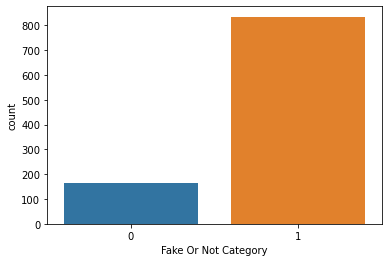

In [26]:
# Outcome countplot
import seaborn as sns
sns.countplot(x = 'Fake Or Not Category',data = data)

<AxesSubplot:>

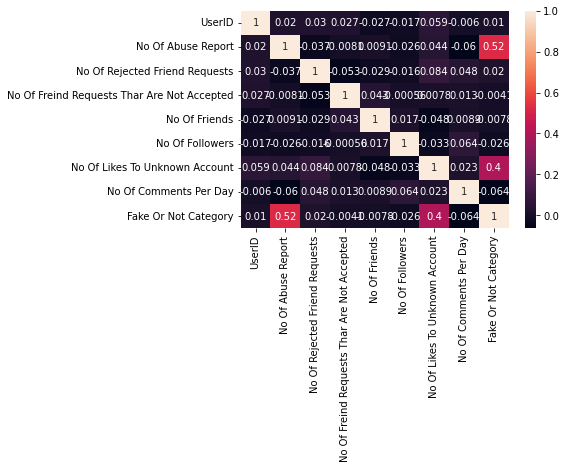

In [27]:
sns.heatmap(data.corr(), annot = True)


In [28]:
X=data.iloc[:,0:8]
Y=data.iloc[:,-1]

In [29]:
#!pip install imbalanced-learn==0.9.0

In [30]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X_bal, Y_bal = sm.fit_resample(X, Y)

In [31]:
Y_bal.value_counts()

1    819
0    819
Name: Fake Or Not Category, dtype: int64

<AxesSubplot:xlabel='Fake Or Not Category', ylabel='count'>

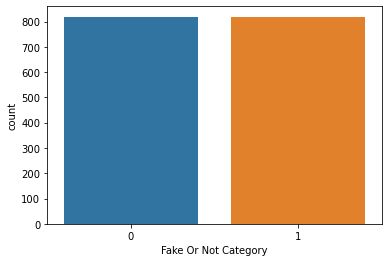

In [32]:
import seaborn as sns
sns.countplot(x = Y_bal,data = data)

In [33]:
final = pd.concat([X_bal, Y_bal], axis = 1)

In [34]:
final

UserID  No Of Abuse Report  No Of Rejected Friend Requests  \
0          1                  37                             415   
1          2                  63                             383   
2          3                  10                             151   
3          4                  83                              54   
4          5                  47                             834   
...      ...                 ...                             ...   
1633     705                   9                             296   
1634     777                  14                             145   
1635     658                  13                             764   
1636     701                  22                             915   
1637     756                  10                             357   

      No Of Freind Requests Thar Are Not Accepted  No Of Friends  \
0                                             204            290   
1                                             542            652   
2                                             244            863   
3                                             604            496   
4                                             326            401   
...                                           ...            ...   
1633                                          582            299   
1634                                          569            850   
1635                                          896            525   
1636                                           71            841   
1637                                          618            148   

      No Of Followers  No Of Likes To Unknown Account  No Of Comments Per Day  \
0                 838                              26                      53   
1                 349                              37                      58   
2                 271                              73                      11   
3                 937                              37                      55   
4                 928                              80                      78   
...               ...                             ...                     ...   
1633               96                              19                      94   
1634              283                              25                      58   
1635              136                              14                      53   
1636              559                              14                      38   
1637              226                              36                      89   

      Fake Or Not Category  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
1633                     0  
1634                     0  
1635                     0  
1636                     0  
1637                     0  

[1638 rows x 9 columns]

In [36]:
final.to_csv("preprocess.csv")